In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("customer_churn_data.csv", sep = ',')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
# looking at how many label each variable has
for col in df.columns:
    print(col, ':', len(df[col].unique()),'labels')

CustomerID : 1000 labels
Age : 57 labels
Gender : 2 labels
Tenure : 87 labels
MonthlyCharges : 935 labels
ContractType : 3 labels
InternetService : 3 labels
TotalCharges : 943 labels
TechSupport : 2 labels
Churn : 2 labels


In [5]:
# seeing how many columsn we will obtain after one hot encoding the variables
pd.get_dummies(df, drop_first=True).shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [7]:
df.isna().sum().sum()# no column is empty

297

In [8]:
df.duplicated().sum() # checking for duplicates

0

In [9]:
df["InternetService"] = df["InternetService"].fillna("No Service").str.strip()

In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_columns_data = df.select_dtypes ( include = ["number"])

In [12]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [13]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,No Service,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,No Service,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,No Service,4465.56,No,Yes


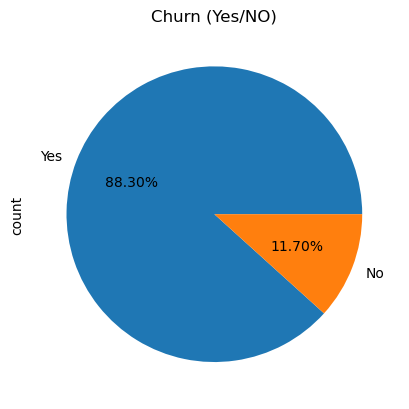

In [14]:
# the number of Churn values labeled yes or no
df["Churn"].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.title("Churn (Yes/NO)")
plt.show()

In [15]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [18]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

###  At the lower terms, we can see that the monthly charge average  decreases

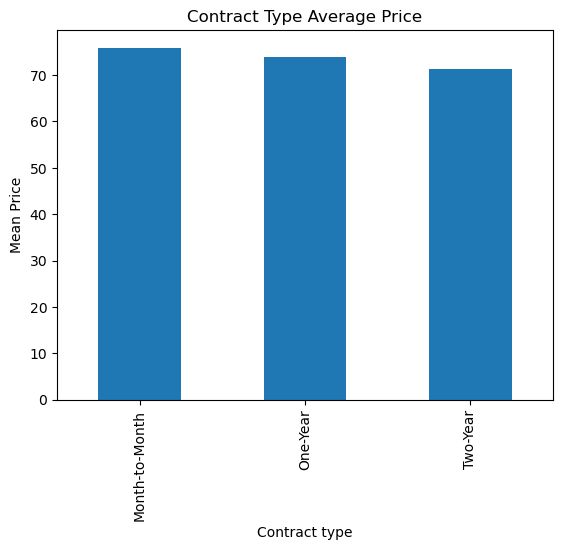

In [19]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract type")
plt.title("Contract Type Average Price")
plt.show()

In [20]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [21]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

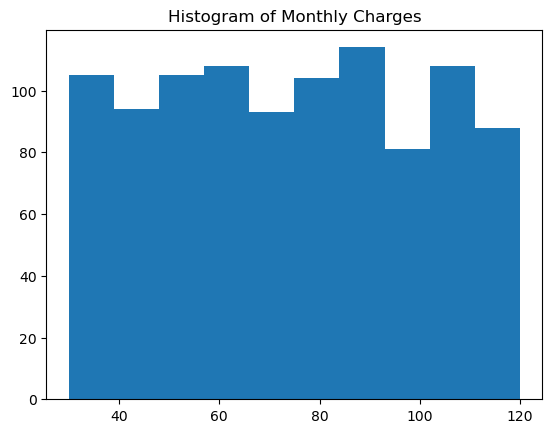

In [22]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

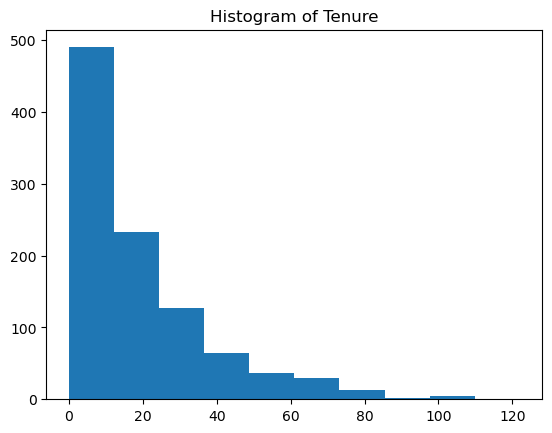

In [23]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

## Feature Engineering 

In [24]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [25]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [26]:
bins = [0, 25, 45, 65, 1000]
#labels = ['Young', 'Adult', 'Senior', 'Elder']
def label_age(age):
    if age <= 24:
        return 'Young'
    elif age > 24 and age <= 44:
        return 'Adult'
    elif age > 44 and age <= 64:
        return 'Senior'
    elif age > 64:
        return 'Elder'
    else:
        return np.nan

df['AgeGroup'] = df['Age'].apply(label_age)

In [27]:
df.tail(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,AgeGroup
990,991,47,Female,9,108.47,Two-Year,No Service,976.23,No,Yes,Senior
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes,Young
992,993,42,Female,46,61.09,Month-to-Month,No Service,2810.14,No,Yes,Adult
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes,Adult
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes,Adult
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes,Adult
996,997,62,Male,9,80.93,Month-to-Month,No Service,728.37,No,Yes,Senior
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes,Senior
998,999,39,Male,68,65.67,One-Year,No Service,4465.56,No,Yes,Adult
999,1000,50,Male,1,56.67,Month-to-Month,No Service,56.67,No,Yes,Senior


In [28]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn', 'AgeGroup'],
      dtype='object')

In [29]:
df["InternetService"].unique()

array(['Fiber Optic', 'DSL', 'No Service'], dtype=object)

In [30]:
# Filter churned customers
churned = df[df['Churn'] == "Yes"]

# Count age group occurrences
age_group_counts = churned['AgeGroup'].value_counts()



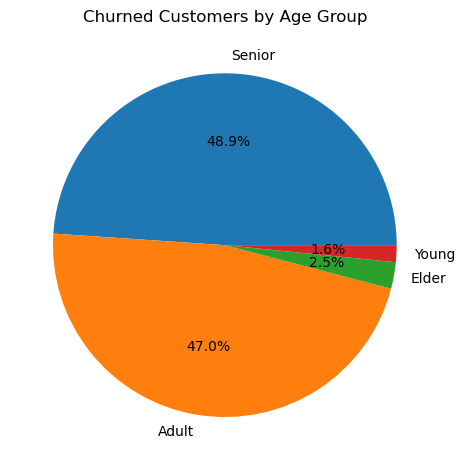

In [31]:
# Pie chart
age_group_counts.plot(kind='pie', autopct='%1.1f%%', title='Churned Customers by Age Group', ylabel='')
plt.tight_layout()
plt.show()


In [32]:
no_churn = df[df['Churn'] == "No"]

# Count age group occurrences
age_group_counts = no_churn['AgeGroup'].value_counts()


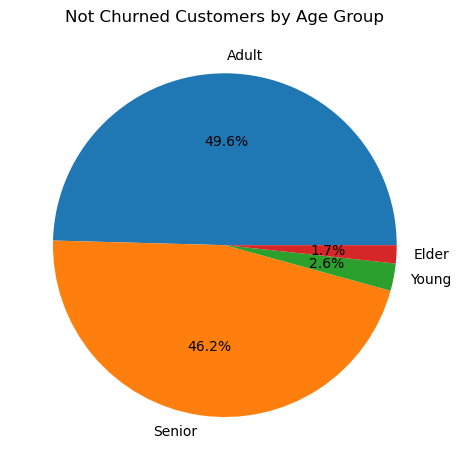

In [33]:
age_group_counts.plot(kind='pie', autopct='%1.1f%%', title='Not Churned Customers by Age Group', ylabel='')
plt.tight_layout()
plt.show()

In [34]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn', 'AgeGroup'],
      dtype='object')

In [35]:
# getting the whole set of dummy variables for all the categorical variables
#def one_hot_top(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels 
    #we can vary the number of most frequent labels that we encode 
    #for label in top_x_labels:
       # df[variable+'_'+label] = np.where(df[variable] ==label, 1,0)
# read data again
#data = pd.read_csv('Churn.csv')

In [36]:
# encode  contract type
categorical_cols = df.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
data_encoded

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,...,InternetService_Fiber Optic,InternetService_No Service,TechSupport_No,TechSupport_Yes,Churn_No,Churn_Yes,AgeGroup_Adult,AgeGroup_Elder,AgeGroup_Senior,AgeGroup_Young
0,1,49,4,88.35,353.40,False,True,True,False,False,...,True,False,False,True,False,True,False,False,True,False
1,2,43,0,36.67,0.00,False,True,True,False,False,...,True,False,False,True,False,True,True,False,False,False
2,3,51,2,63.79,127.58,True,False,True,False,False,...,True,False,True,False,False,True,False,False,True,False
3,4,60,8,102.34,818.72,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
4,5,42,32,69.01,2208.32,False,True,True,False,False,...,False,True,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,42,41,37.14,1522.74,False,True,True,False,False,...,True,False,False,True,False,True,True,False,False,False
996,997,62,9,80.93,728.37,False,True,True,False,False,...,False,True,True,False,False,True,False,False,True,False
997,998,51,15,111.72,1675.80,True,False,True,False,False,...,True,False,False,True,False,True,False,False,True,False
998,999,39,68,65.67,4465.56,False,True,False,True,False,...,False,True,True,False,False,True,True,False,False,False


In [38]:
# Use only one target column (e.g., 'Churn_Yes') for binary classification
y = data_encoded['Churn_Yes']

# Drop both churn columns from features
X = data_encoded.drop(['Churn_Yes', 'Churn_No', 'CustomerID'], axis=1)

In [39]:
X

,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_No Service,TechSupport_No,TechSupport_Yes,AgeGroup_Adult,AgeGroup_Elder,AgeGroup_Senior,AgeGroup_Young
0,49,4,88.35,353.40,False,True,True,False,False,False,True,False,False,True,False,False,True,False
1,43,0,36.67,0.00,False,True,True,False,False,False,True,False,False,True,True,False,False,False
2,51,2,63.79,127.58,True,False,True,False,False,False,True,False,True,False,False,False,True,False
3,60,8,102.34,818.72,True,False,False,True,False,True,False,False,False,True,False,False,True,False
4,42,32,69.01,2208.32,False,True,True,False,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42,41,37.14,1522.74,False,True,True,False,False,False,True,False,False,True,True,False,False,False
996,62,9,80.93,728.37,False,True,True,False,False,False,False,True,True,False,False,False,True,False
997,51,15,111.72,1675.80,True,False,True,False,False,False,True,False,False,True,False,False,True,False
998,39,68,65.67,4465.56,False,True,False,True,False,False,False,True,True,False,True,False,False,False


In [40]:
#from sklearn.preprocessing import LabelEncoder
# Stripping the whitespace
#df["InternetService"] = df["InternetService"].str.strip()
#df["AgeGroup"] = df["AgeGroup"].str.strip()
#df["InternetService"]
#encoder = LabelEncoder()
#df["AgeGroup"] = encoder.fit_transform(df["AgeGroup"]) 
#df["InternetService"] = encoder.fit_transform(df["InternetService"])
#df["Tenure"] = encoder.fit_transform(df["Tenure"])
#df["ContractType"] = encoder.fit_transform(df["ContractType"])

## Training and testing  

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
X

,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_No Service,TechSupport_No,TechSupport_Yes,AgeGroup_Adult,AgeGroup_Elder,AgeGroup_Senior,AgeGroup_Young
0,49,4,88.35,353.40,False,True,True,False,False,False,True,False,False,True,False,False,True,False
1,43,0,36.67,0.00,False,True,True,False,False,False,True,False,False,True,True,False,False,False
2,51,2,63.79,127.58,True,False,True,False,False,False,True,False,True,False,False,False,True,False
3,60,8,102.34,818.72,True,False,False,True,False,True,False,False,False,True,False,False,True,False
4,42,32,69.01,2208.32,False,True,True,False,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42,41,37.14,1522.74,False,True,True,False,False,False,True,False,False,True,True,False,False,False
996,62,9,80.93,728.37,False,True,True,False,False,False,False,True,True,False,False,False,True,False
997,51,15,111.72,1675.80,True,False,True,False,False,False,True,False,False,True,False,False,True,False
998,39,68,65.67,4465.56,False,True,False,True,False,False,False,True,True,False,True,False,False,False


In [43]:
print(X_train.dtypes)

Age                              int64
Tenure                           int64
MonthlyCharges                 float64
TotalCharges                   float64
Gender_Female                     bool
Gender_Male                       bool
ContractType_Month-to-Month       bool
ContractType_One-Year             bool
ContractType_Two-Year             bool
InternetService_DSL               bool
InternetService_Fiber Optic       bool
InternetService_No Service        bool
TechSupport_No                    bool
TechSupport_Yes                   bool
AgeGroup_Adult                    bool
AgeGroup_Elder                    bool
AgeGroup_Senior                   bool
AgeGroup_Young                    bool
dtype: object


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
# joblib will help me save my model so i dont have to retrain all the time
import joblib
joblib.dump(scaler, "scaler.pkl") 

['scaler.pkl']

In [48]:
X_test = scaler.transform(X_test)

In [49]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print("Accuracy score on model is: {}".format(accuracy_score(y_test, prediction)))

In [50]:
from sklearn.model_selection import GridSearchCV
#This is for hyperparameter tuning 

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression()

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
X

,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_No Service,TechSupport_No,TechSupport_Yes,AgeGroup_Adult,AgeGroup_Elder,AgeGroup_Senior,AgeGroup_Young
0,49,4,88.35,353.40,False,True,True,False,False,False,True,False,False,True,False,False,True,False
1,43,0,36.67,0.00,False,True,True,False,False,False,True,False,False,True,True,False,False,False
2,51,2,63.79,127.58,True,False,True,False,False,False,True,False,True,False,False,False,True,False
3,60,8,102.34,818.72,True,False,False,True,False,True,False,False,False,True,False,False,True,False
4,42,32,69.01,2208.32,False,True,True,False,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42,41,37.14,1522.74,False,True,True,False,False,False,True,False,False,True,True,False,False,False
996,62,9,80.93,728.37,False,True,True,False,False,False,False,True,True,False,False,False,True,False
997,51,15,111.72,1675.80,True,False,True,False,False,False,True,False,False,True,False,False,True,False
998,39,68,65.67,4465.56,False,True,False,True,False,False,False,True,True,False,True,False,False,False


In [146]:
df[df['Churn'] == 'Yes'].sample(1).iloc[0]

CustomerID                  41
Age                         52
Gender                    Male
Tenure                      12
MonthlyCharges          111.74
ContractType          One-Year
InternetService    Fiber Optic
TotalCharges           1340.88
TechSupport                Yes
Churn                      Yes
AgeGroup                Senior
Name: 40, dtype: object

In [56]:
y_pred_logreg = log_model.predict(X_test) 

In [57]:
y_test

678     True
877     True
666     True
999     True
251     True
       ...  
652     True
86     False
115     True
839     True
332     True
Name: Churn_Yes, Length: 200, dtype: bool

In [58]:
# we are going to compare 
modelperformance(y_pred_logreg)

Accuracy score on model is: 0.965


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
# previously, the minority class was not even predicted, this is what caused the accuracy score to be even higher

[[ 15   5]
 [  2 178]]
              precision    recall  f1-score   support

       False       0.88      0.75      0.81        20
        True       0.97      0.99      0.98       180

    accuracy                           0.96       200
   macro avg       0.93      0.87      0.90       200
weighted avg       0.96      0.96      0.96       200



In [60]:
# since the class is imbaalanced i want to improve the score by using SMOTE
from imblearn.over_sampling import SMOTE

In [61]:
model = LogisticRegression(class_weight = 'balanced')

In [62]:
sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [63]:
model.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced')

In [64]:
y_pred_sm_lg = model.predict(X_test) 

In [65]:
modelperformance(y_pred_sm_lg)

Accuracy score on model is: 0.89


In [66]:
print(confusion_matrix(y_test, y_pred_sm_lg))
print(classification_report(y_test, y_pred_sm_lg))

[[ 18   2]
 [ 20 160]]
              precision    recall  f1-score   support

       False       0.47      0.90      0.62        20
        True       0.99      0.89      0.94       180

    accuracy                           0.89       200
   macro avg       0.73      0.89      0.78       200
weighted avg       0.94      0.89      0.90       200



In [67]:
# Trying K Neighbor just to see
from sklearn.neighbors import KNeighborsClassifier

In [68]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights" : ["uniform", "distance"],
}

In [69]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [70]:
gridkn.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [71]:
gridkn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [72]:
y_pred_kn = gridkn.predict(X_test)

In [73]:
modelperformance(y_pred_kn)

Accuracy score on model is: 0.89


In [74]:
print(confusion_matrix(y_test, y_pred_kn))
print(classification_report(y_test, y_pred_kn))

[[ 16   4]
 [ 18 162]]
              precision    recall  f1-score   support

       False       0.47      0.80      0.59        20
        True       0.98      0.90      0.94       180

    accuracy                           0.89       200
   macro avg       0.72      0.85      0.76       200
weighted avg       0.93      0.89      0.90       200



In [75]:
from sklearn.svm import SVC

In [76]:
svm = SVC()

In [77]:
param_grid ={
    "C" : [0.01,0.1,0.5,1],
    "kernel": ["linear", "rbf", "poly"]
}

In [78]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)

In [79]:
gridsvc.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [80]:
gridsvc.best_params_

{'C': 1, 'kernel': 'linear'}

In [81]:
y_pred_svm = gridsvc.predict(X_test)

In [82]:
modelperformance(y_pred_svm)

Accuracy score on model is: 0.91


In [83]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[ 19   1]
 [ 17 163]]
              precision    recall  f1-score   support

       False       0.53      0.95      0.68        20
        True       0.99      0.91      0.95       180

    accuracy                           0.91       200
   macro avg       0.76      0.93      0.81       200
weighted avg       0.95      0.91      0.92       200



In [84]:
# Using Decision Trees 
from sklearn.tree import DecisionTreeClassifier

In [85]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [3,5,7,10], # using smaller depths
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [86]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [87]:
grid_tree.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [88]:
grid_tree.best_params_
# Want to reduce overfittling by reducing tree depth 

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [89]:
y_pred_tree = grid_tree.predict(X_test)

In [90]:
y_pred_tree

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [91]:
modelperformance(y_pred_tree)

Accuracy score on model is: 1.0


In [92]:
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[ 20   0]
 [  0 180]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00       180

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [93]:
# Using random forest
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(
    max_depth = 10, # Maximum depth of each tree (prevents overfitting)
    min_samples_split = 5, # Minimum number of samples required to split an internal node
    random_state = 42,  # For reproducibility
    class_weight = 'balanced'
)

In [94]:
param_grid ={
    "n_estimators" : [32,64,128,256], 
    "max_features": [2,3,4],
    "bootstrap" : [True, False]
}

In [95]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [96]:
grid_rfc.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10, min_samples_split=5,
                                              random_state=42),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [97]:
grid_rfc.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 32}

In [98]:
y_pred_rfc = grid_rfc.predict(X_test)

In [99]:
y_pred_rfc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [100]:
modelperformance(y_pred_rfc)

Accuracy score on model is: 0.995


In [101]:
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[ 19   1]
 [  0 180]]
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.99      1.00      1.00       180

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.99       200
weighted avg       1.00      0.99      0.99       200



In [102]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [103]:
param_grid = {
     'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
grid = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_resampled, y_resampled)
#best_model = grid.best_estimator_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1]},
             scoring='f1_weighted')

In [104]:
y_pred_xgb = xgb_model.predict(X_test)

In [105]:
y_pred_xgb 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1])

In [106]:
modelperformance(y_pred_xgb)

Accuracy score on model is: 1.0


In [107]:
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[ 20   0]
 [  0 180]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00       180

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [108]:
from sklearn.ensemble import VotingClassifier # using a voting classifier 

voting_clf = VotingClassifier(estimators=[
    ('xgb', XGBClassifier()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
], voting='soft')

voting_clf.fit(X_resampled, y_resampled)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constra...None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('svm', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [109]:
y_pred_vclf = voting_clf.predict(X_test)

In [110]:
y_pred_vclf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [111]:
print(confusion_matrix(y_test, y_pred_vclf))
print(classification_report(y_test, y_pred_vclf))

[[ 20   0]
 [  0 180]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00       180

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [112]:
from sklearn.ensemble import StackingClassifier

In [113]:
stack = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier()),
        ('rf', RandomForestClassifier()),
    ],
    final_estimator=LogisticRegression()
)

In [114]:
stack.fit(X_resampled, y_resampled)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [115]:
y_pred_stack = stack.predict(X_test)

In [116]:
y_pred_stack

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [117]:
modelperformance(y_pred_stack)

Accuracy score on model is: 1.0


In [118]:
print(confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

[[ 20   0]
 [  0 180]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00       180

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [149]:
best_model = grid_rfc.best_estimator_

In [150]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [121]:
X.columns

Index(['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Gender_Female',
       'Gender_Male', 'ContractType_Month-to-Month', 'ContractType_One-Year',
       'ContractType_Two-Year', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'InternetService_No Service',
       'TechSupport_No', 'TechSupport_Yes', 'AgeGroup_Adult', 'AgeGroup_Elder',
       'AgeGroup_Senior', 'AgeGroup_Young'],
      dtype='object')

## Tensor Flow and deep learning 

In [122]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [123]:
model = Sequential()
model.add(Dense(units = 32, activation ="relu", input_dim = X_resampled.shape[1]))
model.add(Dense(units = 64, activation="relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

In [124]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics= ['accuracy'])

In [125]:
model.fit(X_resampled, y_resampled, epochs = 150, batch_size=32)

Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4506 - loss: 0.7474 
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.6400
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.5629
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8521 - loss: 0.5016
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: 0.4311
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.3839
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9101 - loss: 0.3458
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9011 - loss: 0.3179
Epoch 9/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9284 - loss: 0.2728
Epoch 10/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9340 - loss: 0.2530
Epoch 11/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9239 - loss: 0.2453
Epoch 12/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [126]:
y_pred_tf = model.predict(X_test)
y_pred_tf = [0 if val < 0.5 else 1 for val in y_pred_tf]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [127]:
y_pred_tf

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1]

In [128]:
modelperformance(y_pred_tf) 

Accuracy score on model is: 0.965


In [129]:
print(confusion_matrix(y_test, y_pred_tf))
print(classification_report(y_test, y_pred_tf))

[[ 18   2]
 [  5 175]]
              precision    recall  f1-score   support

       False       0.78      0.90      0.84        20
        True       0.99      0.97      0.98       180

    accuracy                           0.96       200
   macro avg       0.89      0.94      0.91       200
weighted avg       0.97      0.96      0.97       200



In [130]:
model.save('tfmodel.keras')

In [131]:
X.columns

Index(['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Gender_Female',
       'Gender_Male', 'ContractType_Month-to-Month', 'ContractType_One-Year',
       'ContractType_Two-Year', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'InternetService_No Service',
       'TechSupport_No', 'TechSupport_Yes', 'AgeGroup_Adult', 'AgeGroup_Elder',
       'AgeGroup_Senior', 'AgeGroup_Young'],
      dtype='object')

In [1]:
!streamlit run Churn_app.py

^C


In [151]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
